In [1]:
!pip install ISLP

  Using cached ISLP-0.3.22-py3-none-any.whl.metadata (7.0 kB)
  Using cached pandas-1.5.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.0 MB)
  Using cached lifelines-0.28.0-py3-none-any.whl.metadata (3.2 kB)
  Using cached pygam-0.9.0-py3-none-any.whl (522 kB)
  Using cached torch-2.2.0-cp311-cp311-manylinux1_x86_64.whl.metadata (25 kB)
  Using cached pytorch_lightning-2.1.4-py3-none-any.whl.metadata (21 kB)
  Using cached torchmetrics-1.3.0.post0-py3-none-any.whl.metadata (20 kB)
  Using cached autograd-1.6.2-py3-none-any.whl.metadata (706 bytes)
  Using cached autograd_gamma-0.5.0-py3-none-any.whl
  Using cached formulaic-1.0.1-py3-none-any.whl.metadata (6.1 kB)
  Using cached progressbar2-4.3.2-py3-none-any.whl.metadata (16 kB)
  Using cached lightning_utilities-0.10.1-py3-none-any.whl.metadata (4.8 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.

# Imports

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)
import matplotlib.pyplot as plt

# Loading Dataset

In [4]:
# Loading a dataset from ISLP
dataset = load_data("Boston")
dataset.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

# Base Simple Linear Regression to use for all the activities

In [5]:
# from the dataset we select a column to use for our x-axis
X = dataset['lstat']
X = sm.add_constant(X) # adding a constant term using lib, this constant term is needed for the linear regression model intercept
X[:4]

,const,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [6]:
# from the dataset we select a column to use for our y-axis (dependant variable)
y = dataset['medv']
model = sm.OLS(y, X) # Uses Ordinary Least Squares (OLS) regression from lib to fit a linear regression model (sm.OLS) with 'medv' as the dependent variable and 'lstat' (plus the constant term) as the independent variable
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
const,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


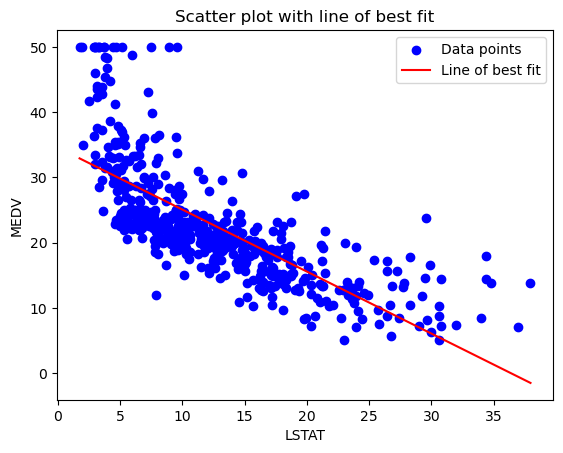

In [7]:
plt.scatter(dataset['lstat'], dataset['medv'], color='blue', label='Data points') # basically plots the blue plots on the graph

lstat_line = np.linspace(dataset['lstat'].min(), dataset['lstat'].max()) # creates a list of numbers evenly spaced between min and max 

# IMPORTANT
# results.params['const'] retrieves the estimated coefficient (parameter) of the constant term from the linear regression model {hence B_0}
# results.params['lstat'] retrieves the estimated coefficient of the 'lstat' variable from the linear regression model {hence B_1}
# results.params['const'] + results.params['lstat'] * lstat_line computes the predicted 'medv' values based on the linear regression equation {hence B_1 * x}
# This line calculates the values for the 'medv' variable using the coefficients obtained from the regression results and the 'lstat' values in lstat_line
# It essentially represents the regression line or line of best fit based on the model's coefficients and the range of 'lstat' values
# RECALL: this is essentially the equation we just learnt y^ = B_0 + B_1*x
medv_line = results.params['const'] + results.params['lstat'] * lstat_line

plt.plot(lstat_line, medv_line, color='red', label='Line of best fit') # plotting best fit by plotting the 'lstat_line' values along the x-axis against the 'medv_line' values along the y-axis

plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Scatter plot with line of best fit')
plt.legend()

# Simple Linear Regression

### Exercise 1:

In [8]:
# this time we're gonna use another dataset from ISLP
# TODO: import the dataset Hitters (Hint -- look at the Loading Dataset section)
new_dataset = load_data("Hitters")
new_dataset.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')

In [9]:
X_2 = new_dataset['CRuns'] # TODO: set the column CRuns as the independent variable along the x-axis
X_2 = sm.add_constant(X_2) # add a constant term using lib, this constant term is needed for the linear regression model intercept
X_2[:4]

,const,CRuns
0,1.0,30
1,1.0,321
2,1.0,224
3,1.0,828


In [14]:
y_2 = new_dataset['Hits'] # TODO: set the column Hits as the dependent variable along the y-axis
second_model = sm.OLS(y_2, X_2) # TODO: Use Ordinary Least Squares (OLS) regression from lib to fit a linear regression model
second_results = second_model.fit() # TODO: replace
summarize(second_results) # TODO: replace

,coef,std err,t,P>|t|
const,87.9649,3.675,23.935,0.0
CRuns,0.0364,0.008,4.852,0.0


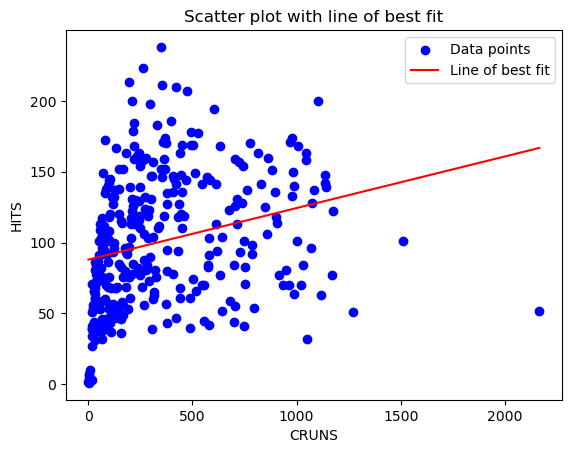

In [16]:
# TODO: calculate the linear regression and plot the graph
plt.scatter(new_dataset['CRuns'], new_dataset['Hits'], color='blue', label='Data points')

CRuns_line = np.linspace(new_dataset['CRuns'].min(), new_dataset['CRuns'].max())
Hits_line = second_results.params['const'] + second_results.params['CRuns'] * CRuns_line

plt.plot(CRuns_line, Hits_line, color='red', label='Line of best fit')

plt.xlabel('CRUNS')
plt.ylabel('HITS')
plt.title('Scatter plot with line of best fit')
plt.legend()

### Exercise 2:

In [17]:
X_3 = new_dataset['Walks'] # TODO: set the column Walks as the independent variable along the x-axis
X_3 = sm.add_constant(X_3) # add a constant term using lib, this constant term is needed for the linear regression model intercept
X_3[:4]

,const,Walks
0,1.0,14
1,1.0,39
2,1.0,76
3,1.0,37


In [19]:
y_3 = new_dataset['AtBat'] # TODO: set the column  as the dependent variable along the y-axis
third_model = sm.OLS(y_3, X_3) # TODO: Use Ordinary Least Squares (OLS) regression from lib to fit a linear regression model
third_results = third_model.fit() # TODO: replace
summarize(third_results) # TODO: replace

,coef,std err,t,P>|t|
const,196.9553,13.053,15.089,0.0
Walks,4.7486,0.294,16.138,0.0


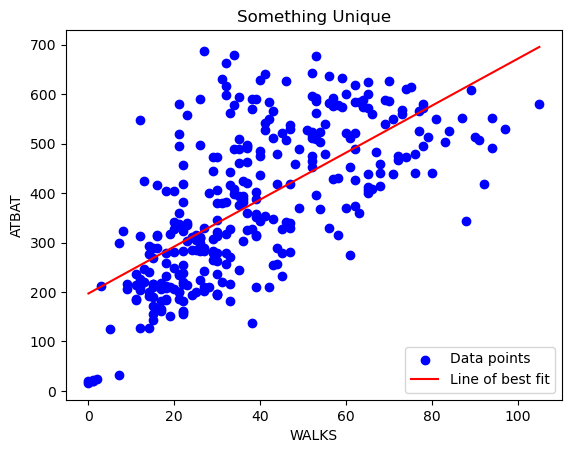

In [20]:
# TODO: calculate the linear regression and plot the graph
plt.scatter(new_dataset['Walks'], new_dataset['AtBat'], color='blue', label='Data points')

Walks_line = np.linspace(new_dataset['Walks'].min(), new_dataset['Walks'].max())
AtBat_line = third_results.params['const'] + third_results.params['Walks'] * Walks_line

plt.plot(Walks_line, AtBat_line, color='red', label='Line of best fit')

plt.xlabel('WALKS')
plt.ylabel('ATBAT')
# TODO: name the graph something unique
plt.title('Something Unique')
plt.legend()

# Standard Error and Confidence Intervals

Standard Error

In [21]:
# Calculating S.E using lib
summarize(results)['std err']

const    0.563
lstat    0.039
Name: std err, dtype: float64

In [22]:
# Get the residuals
e_terms = results.resid

In [23]:
n = len(dataset['lstat'])  # TODO - hint: number of observations
p = 2  # TODO - hint: number of parameters estimated (intercept and slope)
SSR = np.sum(e_terms**2) # TODO
sigma_squared = SSR / (n-p) # TODO
sigma_squared

38.63567741731437

In [24]:
# y_hat = beta_0_hat + beta_1_hat*x
# Calculate the sum of squares of the differences from the mean of 'lstat'
lstat_mean = np.mean(dataset['lstat']) # TODO
sum_squares = np.sum((dataset['lstat'] - lstat_mean)**2) # TODO

# Calculate SE(beta_1_hat) - the standard error of the slope
SE_beta_1_hat = np.sqrt(sigma_squared / sum_squares) # TODO

# Calculate SE(beta_0_hat) - the standard error of the intercept
SE_beta_0_hat = np.sqrt(sigma_squared * (1/n + lstat_mean**2 / sum_squares)) # TODO

SE_beta_1_hat, SE_beta_0_hat

(0.03873341621263942, 0.5626273549884331)

Confidence Intervals

In [25]:
# Using the library
results.conf_int()

,0,1
const,33.448457,35.659225
lstat,-1.026148,-0.873951


In [26]:
# Calculating it manually
beta_0_hat = results.params[0]
beta_1_hat = results.params[1]

beta_0_min_val = beta_0_hat - (2*SE_beta_0_hat) # TODO
beta_0_max_val = beta_0_hat + (2*SE_beta_0_hat) # TODO


beta_1_min_val = beta_1_hat - (2*SE_beta_1_hat) # TODO
beta_1_max_val = beta_1_hat + (2*SE_beta_1_hat) # TODO

((beta_0_min_val, beta_0_max_val), (beta_1_min_val, beta_1_max_val))

((33.428586169406216, 35.679095589359946),
 (-1.0275161861832702, -0.8725825213327126))

# Hypothesis Testing

### Null Hypothesis

In [27]:
# H₀: The data is normally distributed.
# H₁: The data is not normally distributed
# Assume that α=0.05. If the p-value is <0.05, it can be said that data is normally distributed.n

### t-statistic

In [28]:
# calculate the t-statistic for beta_hat_1
t_stat_beta_1 = results.params['lstat'] / SE_beta_1_hat # TODO: use formula (beta_hat_1 - 0) / SE(beta_hat_1)
t_stat_beta_1

-24.527899851187748

### p-value

In [29]:
# calculate the degrees of freedom
degrees_freedom = len(dataset['lstat']) - 2 # TODO (Hint -- Two parameters intercept and slope)

# Calculate the p-value for beta_1_hat
p_value_beta_1 = 2 * (1 - stats.t.cdf(abs(t_stat_beta_1), degrees_freedom)) # TODO: use formula p = 2×(1−cdf(∣t-statistic∣))
# HINT: look into stats.t.cdf() from the scipy lib
p_value_beta_1

0.0

# RSE, R^2 and F-Statistic

### RSE

In [30]:
# RSS using lib
np.sum(results.resid**2)

19472.38141832644

In [31]:
# Calculating RSS manually
beta_0_hat = results.params[0]
beta_1_hat = results.params[1]
x = dataset['lstat'] # TODO
y = dataset['medv'] # TODO
y_hat = beta_0_hat + (beta_1_hat * x) # TODO
RSS = np.sum((y-y_hat)**2) # TODO
RSS

19472.38141832644

In [32]:
# RSE using lib
np.sqrt(results.mse_resid)

6.215760405398068

In [33]:
# Calculating RSE manually
n = y.shape[0] # TODO
RSE = np.sqrt(RSS/(n-2)) # TODO
RSE

6.215760405398069

### R-squared

In [34]:
# R-squared using lib
results.rsquared

0.5441462975864799

In [35]:
# Calculating R squared manually

# Calculating TSS
y_mean = np.mean(y) # TODO
TSS = np.sum((y - y_mean)**2) # TODO

# Calculating R-squared
r_squared = 1 - (RSS/TSS) #TODO

r_squared

0.5441462975864797

### F-statistic

In [36]:
# Calculating it manually
results.fvalue

601.6178711098955

In [37]:
p = X.shape[1]  # TODO - number of predictors including the intercept
n = len(y)  # TODO - number of observations

In [38]:
f_value = ((TSS - RSS) / (p-1)) / (RSS / (n - p)) # TODO
f_value

601.6178711098953

# Multiple Linear Regression

In [39]:
# imports
from mpl_toolkits.mplot3d import Axes3D

In [40]:
# from the dataset we select multiple columns to use for our x-axis (independent variables)
X = dataset[['lstat', 'age']]
X = sm.add_constant(X) # add a constant term using lib, this constant term is needed for the linear regression model intercept

In [41]:
# TODO: set the dependent variable along the y-axis
y = dataset['medv']
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
const,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [42]:
# Get the coefficients from the fitted model
coef = results.params

# Generate coordinates for the plane using lstat and age values
lstat_vals = np.linspace(dataset['lstat'].min(), dataset['lstat'].max(), 100) # TODO: Use Ordinary Least Squares (OLS) regression from lib to fit a linear regression model, only 100 intervals
age_vals = np.linspace(dataset['age'].min(), dataset['age'].max(), 100) # TODO: Use Ordinary Least Squares (OLS) regression from lib to fit a linear regression model, only 100 intervals
lstat_vals, age_vals = np.meshgrid(lstat_vals, age_vals)
medv_vals = coef[0] + coef[1] * lstat_vals + coef[2] * age_vals

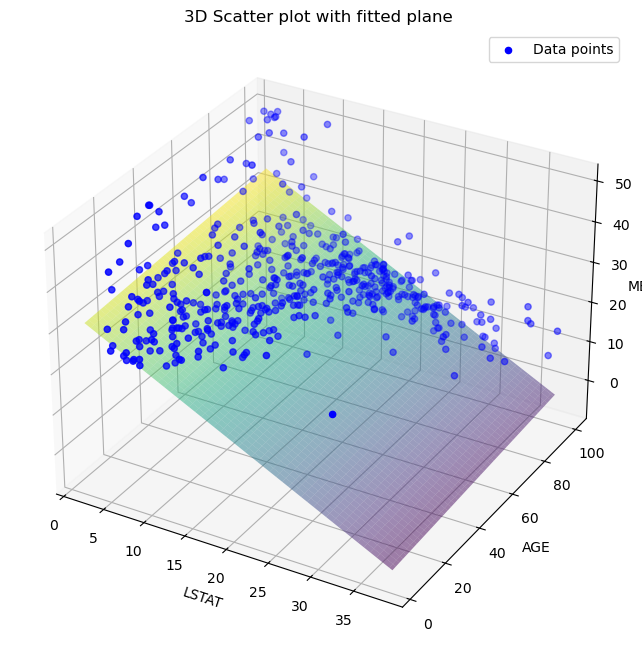

In [43]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(dataset['lstat'], dataset['age'], dataset['medv'], color='blue', label='Data points')

# Plot the fitted plane
ax.plot_surface(lstat_vals, age_vals, medv_vals, alpha=0.5, cmap='viridis')

# Set labels and title
ax.set_xlabel('LSTAT')
ax.set_ylabel('AGE')
ax.set_zlabel('MEDV')
ax.set_title('3D Scatter plot with fitted plane')

# Show the plot
plt.legend()
plt.show()

## Polynomial Regression

TODO: in the below cell, make your dataframe look like this when you print out the first 4 records

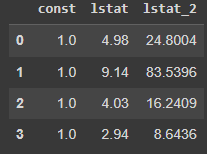

In [44]:
# TODO
X = dataset[['lstat']].copy()
X['lstat_2'] = X['lstat'] ** 2
X = sm.add_constant(X)
X[:4]

,const,lstat,lstat_2
0,1.0,4.98,24.8004
1,1.0,9.14,83.5396
2,1.0,4.03,16.2409
3,1.0,2.94,8.6436


In [45]:
y = dataset['medv']
model = sm.OLS(y, X)
results = model.fit()

In [46]:
summarize(results)

,coef,std err,t,P>|t|
const,42.8620,0.872,49.149,0.0
lstat,-2.3328,0.124,-18.843,0.0
lstat_2,0.0435,0.004,11.628,0.0


In [47]:
results.params

const      42.862007
lstat      -2.332821
lstat_2     0.043547
dtype: float64

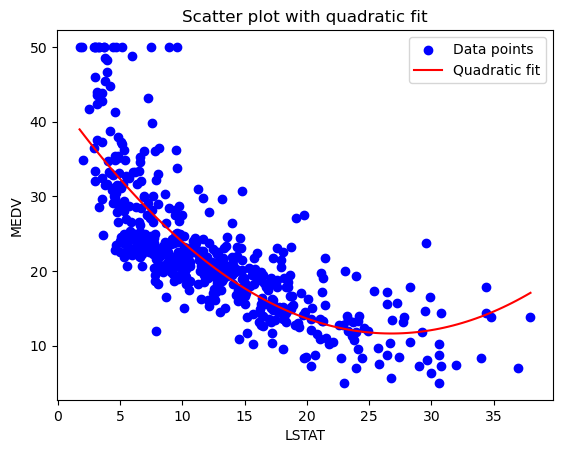

In [48]:
# Scatter plot of the data points
plt.scatter(dataset['lstat'], dataset['medv'], color='blue', label='Data points')

# Generate a range of values for lstat to plot the curve
lstat_line = np.linspace(dataset['lstat'].min(), dataset['lstat'].max(), 100)

# Calculate the corresponding medv values using the regression results
# Include the quadratic term in the prediction
medv_line = results.params['const'] + results.params['lstat'] * lstat_line + results.params['lstat_2'] * lstat_line**2

# Plot the quadratic curve
plt.plot(lstat_line, medv_line, color='red', label='Quadratic fit')

# Label the axes and add a title
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Scatter plot with quadratic fit')

# Show the legend
plt.legend()

# Display the plot
plt.show()